## 1. Импорт  библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os

In [6]:
file_name = 'full_metrics_3.xlsx'

full_df = pd.read_excel(file_name).drop('Unnamed: 0', axis=1)
full_df

,alg_name,iter,mae,rmse,r2
0,GMT_KAN_hn_1,1,0.14007,0.17543,0.64241
1,GMT_KAN_hn_1,2,0.13545,0.17022,0.65990
2,GMT_KAN_hn_1,3,0.13684,0.17176,0.65548
3,GMT_KAN_hn_1,4,0.13375,0.16864,0.66194
4,GMT_KAN_hn_1,5,0.13062,0.16459,0.67304
5,GMT_KAN_hn_2,1,0.13964,0.17535,0.64265
6,GMT_KAN_hn_2,2,0.14016,0.17544,0.64409
7,GMT_KAN_hn_2,3,0.13972,0.17585,0.64022
8,GMT_KAN_hn_2,4,0.13650,0.17147,0.65573
9,GMT_KAN_hn_2,5,0.13235,0.16684,0.66684


In [61]:
def bar_plot_full_metr(full_df, l_color=None, rot=0, tick_label=None):
    '''Plots result bars from full_metrics df 
    API: https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html
    https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html
    '''
    l_add_errors = ['mae', 'rmse']
    l_r2_errors = ['r2']   

    gp = full_df.drop(['iter'], axis=1).groupby(['alg_name'])
    means = gp.mean()
    errors = gp.std()

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,6))
    means[l_add_errors].plot.bar(yerr=errors[l_add_errors], ax=ax[0], capsize=4, rot=rot, color=l_color, tick_label=tick_label)
    means[l_r2_errors].plot.bar(yerr=errors[l_r2_errors], ax=ax[1], capsize=4, rot=rot, color=l_color, tick_label=tick_label)

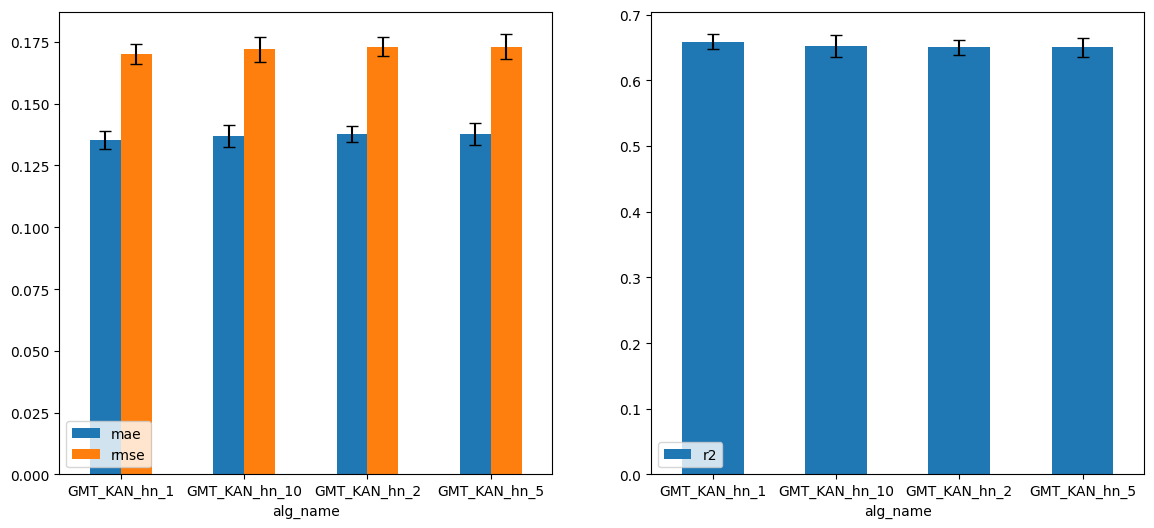

In [62]:
bar_plot_full_metr(full_df)

In [36]:
gp = full_df.drop(['iter'], axis=1).groupby(['alg_name'])
means = gp.mean()
errors = gp.std()

,mae,rmse,r2
alg_name,,,
GMT_KAN_hn_1,0.135346,0.170128,0.658554
GMT_KAN_hn_10,0.136922,0.172018,0.652232
GMT_KAN_hn_2,0.137674,0.172990,0.649906
GMT_KAN_hn_5,0.137676,0.172974,0.649946


<Axes: xlabel='alg_name'>

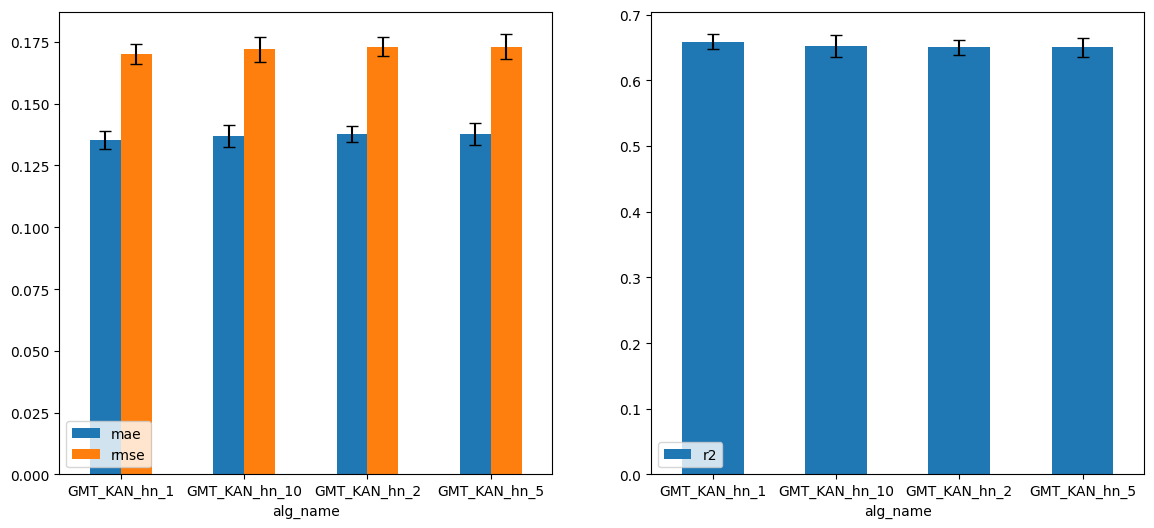

In [48]:
l_add_errors = ['mae', 'rmse']
l_r2_errors = ['r2']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,6))
means[l_add_errors].plot.bar(yerr=errors[l_add_errors], ax=ax[0], capsize=4, rot=0)
means[l_r2_errors].plot.bar(yerr=errors[l_r2_errors], ax=ax[1], capsize=4, rot=0)